# Second Task

In [1]:
import numpy as np  # type: ignore
import pandas as pd  # type: ignore
import matplotlib.pyplot as plt  # type: ignore
import seaborn as sns # type: ignore
import warnings
warnings.filterwarnings("ignore")

## Loading Data

In [2]:
data = pd.read_csv("creditcard.csv")

## Data Preview

In [3]:
data.head(7)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0


## Data Size

In [4]:
data.shape

(284807, 31)

In [5]:
data = data.drop(['Time'], axis = 1)

In [6]:
data.isnull().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

## Unbalanced Data

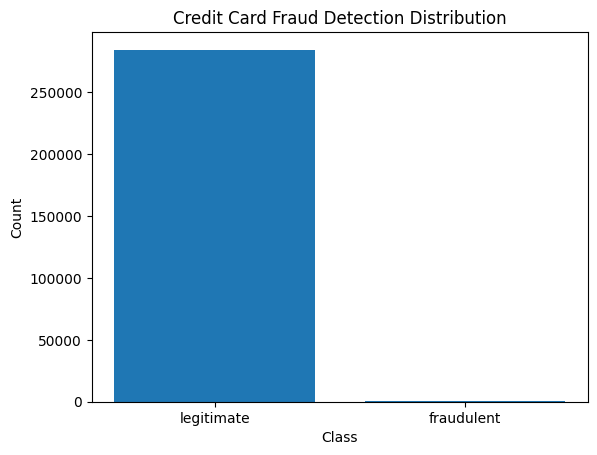

In [7]:
x=data.iloc[:,0:29]
y=data['Class']
count_class = y.value_counts() # Count the occurrences of each class
plt.bar(count_class.index, count_class.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Credit Card Fraud Detection Distribution')
plt.xticks(count_class.index, ['legitimate', 'fraudulent'])
plt.show()


## Normalizing Data

In [8]:
# standardize the data
from sklearn.preprocessing import StandardScaler # type: ignore
scaler = StandardScaler()
x['Amount'] = scaler.fit_transform(x[['Amount']])

In [9]:
# split into training and testing datasets
from sklearn.model_selection import train_test_split # type: ignore
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.30,random_state=120)

In [10]:
# import logistic regression model and accuracy_score metric
from sklearn.linear_model import LogisticRegression # type: ignore
clf = LogisticRegression(solver='liblinear',penalty='l1')

## Oversampling

In [11]:
from imblearn.over_sampling import SMOTE # type: ignore
sm = SMOTE()

In [12]:
X_train_new, y_train_new = sm.fit_resample(X_train, y_train)

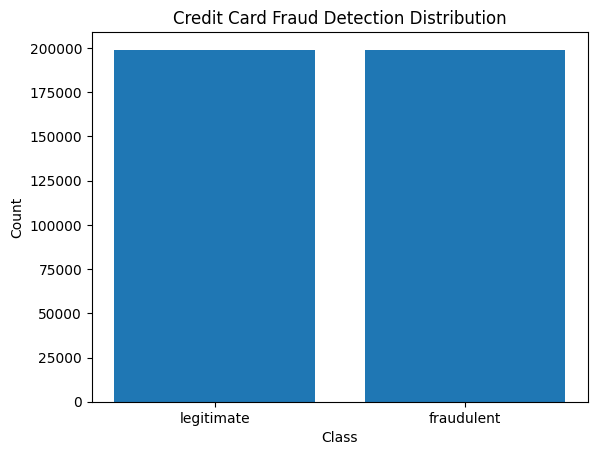

In [13]:
count_class = y_train_new.value_counts() # Count the occurrences of each class
plt.bar(count_class.index, count_class.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Credit Card Fraud Detection Distribution')
plt.xticks(count_class.index, ['legitimate', 'fraudulent'])
plt.show()

In [14]:
# fit the model
clf.fit(X_train_new, y_train_new)

# prediction for Training data
train_pred_sm = clf.predict(X_train_new)

# prediction for Testing data
test_pred_sm = clf.predict(X_test)

In [15]:
print('Confusion Matrix - Testing Dataset')
print(pd.crosstab(y_test.ravel(), test_pred_sm, rownames = ['True'], colnames = ['Predicted'], margins = True))

Confusion Matrix - Testing Dataset
Predicted      0     1    All
True                         
0          83140  2154  85294
1             17   132    149
All        83157  2286  85443


## Evaluating Model

In [16]:
from sklearn.metrics import precision_recall_curve,classification_report # type: ignore

# Assuming you have predicted probabilities
y_scores = clf.predict_proba(X_test)[:, 1]  # Get the probabilities for the positive class

# Get precision-recall curve data
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Find the threshold where precision and recall are balanced
f1_scores = 2 * (precision * recall) / (precision + recall)
best_threshold = thresholds[f1_scores.argmax()]

# Apply the best threshold to make final predictions
y_pred_adjusted = (y_scores >= best_threshold).astype(int)

# Evaluate the adjusted predictions
print("Adjusted Classification Report:")
print(classification_report(y_test, y_pred_adjusted))


Adjusted Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85294
           1       0.81      0.76      0.78       149

    accuracy                           1.00     85443
   macro avg       0.91      0.88      0.89     85443
weighted avg       1.00      1.00      1.00     85443



## Undersampling

In [17]:
from sklearn.model_selection import train_test_split # type: ignore
X_train, X_test, y_train, y_test = train_test_split(x, y, stratify=y, shuffle=True, test_size=0.25)

In [18]:
# Import the necessary libraries
from imblearn.under_sampling import RandomUnderSampler # type: ignore

In [19]:
# Create a RandomUnderSampler object
rus = RandomUnderSampler(random_state=42, sampling_strategy = 'majority')

In [20]:
# Balancing the data
X_resampled, y_X_resampled = rus.fit_resample(X_train, y_train)

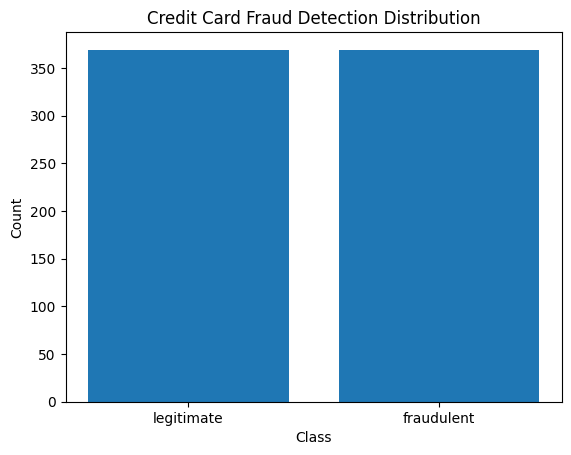

In [21]:
count_class = y_X_resampled.value_counts() # Count the occurrences of each class
plt.bar(count_class.index, count_class.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Credit Card Fraud Detection Distribution')
plt.xticks(count_class.index, ['legitimate', 'fraudulent'])
plt.show()

In [22]:
# import logistic regression model and accuracy_score metric
from sklearn.linear_model import LogisticRegression # type: ignore
clf = LogisticRegression(solver='liblinear',penalty='l1')

In [23]:
# fit the model
clf.fit(X_resampled, y_X_resampled)

# prediction for Training data
train_pred_sm = clf.predict(X_resampled)

# prediction for Testing data
test_pred_sm = clf.predict(X_test)

In [24]:
print('Confusion Matrix - Testing Dataset')
print(pd.crosstab(y_test.ravel(), test_pred_sm, rownames = ['True'], colnames = ['Predicted'], margins = True))

Confusion Matrix - Testing Dataset
Predicted      0     1    All
True                         
0          69439  1640  71079
1             14   109    123
All        69453  1749  71202


## Evaluating Model

In [25]:
from sklearn.metrics import precision_recall_curve,classification_report # type: ignore

# Assuming you have predicted probabilities
y_scores = clf.predict_proba(X_test)[:, 1]  # Get the probabilities for the positive class

# Get precision-recall curve data
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Find the threshold where precision and recall are balanced
f1_scores = 2 * (precision * recall) / (precision + recall)
best_threshold = thresholds[f1_scores.argmax()]

# Apply the best threshold to make final predictions
y_pred_adjusted = (y_scores >= best_threshold).astype(int)

# Evaluate the adjusted predictions
print("Adjusted Classification Report:")
print(classification_report(y_test, y_pred_adjusted))

Adjusted Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.72      0.72      0.72       123

    accuracy                           1.00     71202
   macro avg       0.86      0.86      0.86     71202
weighted avg       1.00      1.00      1.00     71202

